In [2]:
import pandas as pd 
import process
import numpy as np 
#jerome path : r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv'
# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv(r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.fillna(0) # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

In [3]:
import warnings 


warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

lookback_window_0 = [0, 50]
number_of_clusters = 38
sigma = 10e-2
clustering_method = 'SPONGE' 
number_of_repetition = 20
number_of_window=50
evaluation_window = 5
eta=0.01

overall_return, PnL, portfolio_value, sharpe_ratio = process.sliding_window(df_cleaned=df_cleaned, lookback_window_0=lookback_window_0, number_of_clusters=number_of_clusters, sigma=sigma, clustering_method=clustering_method, number_of_repetition=number_of_repetition, number_of_window=number_of_window, evaluation_window=evaluation_window, eta=eta)


1.025393470820314
step 1
1.0311148316541945
step 2
1.035523702193864
step 3
1.0378918504576276
step 4
1.0273928828168755
step 5
1.034283824523518
step 6
1.0427429329941165
step 7
1.037428026216442
step 8
1.042476311785572
step 9
1.040216933478839
step 10
1.0487215360087117
step 11
1.050395983999151
step 12
1.0611598962759416
step 13
1.055406834060964
step 14
1.061598545279766
step 15
1.0693973050383245
step 16
1.0737803239300145
step 17
1.067914020169684
step 18
1.0625261226312894
step 19
1.0745501099747554
step 20
1.084087255875443
step 21
1.0858299603421644
step 22
1.0831696139988167
step 23
1.0858290188300415
step 24
1.0974900279524924
step 25
1.0860026698748182
step 26
1.0850515664374754
step 27
1.0868166068768303
step 28
1.0808707305099394
step 29
1.0719506085274628
step 30
1.07513372189734
step 31
1.0899490183603047
step 32
1.1036892748108336
step 33
1.1054367596538246
step 34
1.111340665379587
step 35
1.113612666224809
step 36
1.1206552133204906
step 37
1.1265935795107218
step 3

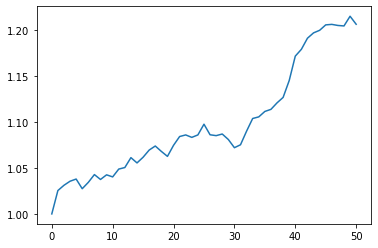

In [4]:
import matplotlib.pyplot as plt

plt.plot(portfolio_value)

In [14]:
sharpe_ratio =0.13  / (overall_return.std()* np.sqrt(252))
sharpe_ratio

portfolio return    2.678801
dtype: float64

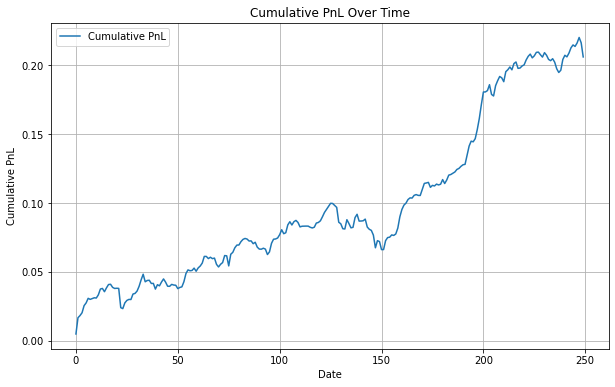

In [16]:
import matplotlib.pyplot as plt


# Tracez le PnL cumulatif
plt.figure(figsize=(10, 6))
plt.plot(PnL, label='Cumulative PnL')
plt.title('Cumulative PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.legend()
plt.grid(True)
plt.show()

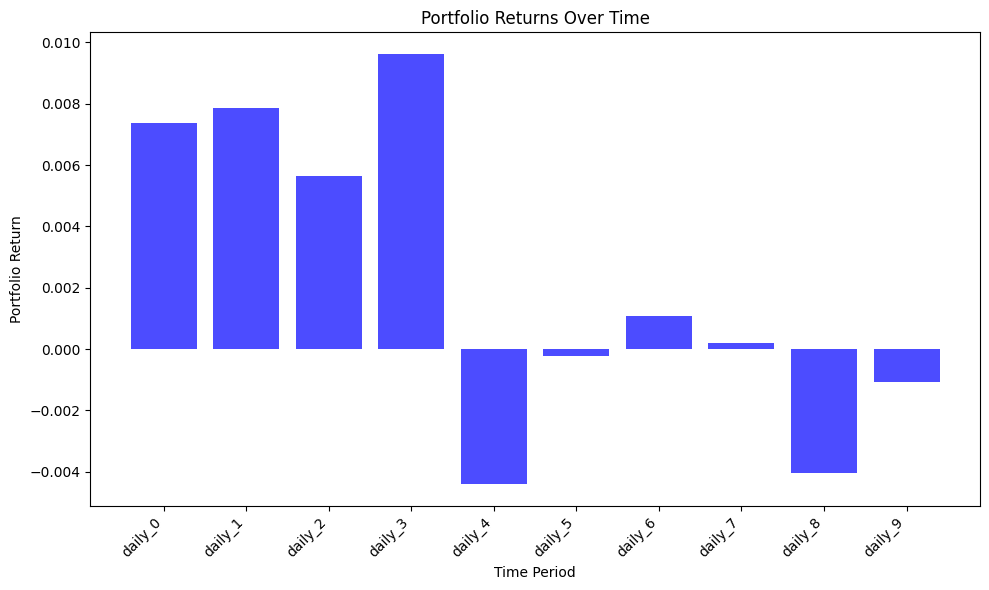

In [8]:
process.bar_plot_PnL(PnL)


In [ ]:
import warnings

################## PARAMETERS #################################################################
lookback_window = [0, 250]
number_of_clusters = 20
sigma = 10e-1
clustering_method = 'signed_laplacian' 
number_of_repetition = 10
evaluation_window = 10
eta=0.01
###############################################################################################

warnings.filterwarnings('ignore')

PnL = []
overall_return = pd.DataFrame()
portfolio_value =[1]

consolidated_W_1 = process.consolidated_W(number_of_repetitions=number_of_repetition, lookback_window=lookback_window, df_cleaned=df_cleaned, number_of_clusters=number_of_clusters, sigma=sigma, evaluation_window=evaluation_window, eta=eta)
portoflio_return_1 = process.portfolio_returns(evaluation_window=evaluation_window, df_cleaned=df_cleaned, lookback_window=lookback_window, consolidated_W=consolidated_W_1)

lookback_window_1 = [lookback_window[0] + evaluation_window, lookback_window[1] + evaluation_window]

consolidated_W_2 = process.consolidated_W(number_of_repetitions=number_of_repetition, lookback_window=lookback_window_1, df_cleaned=df_cleaned, number_of_clusters=number_of_clusters, sigma=sigma, evaluation_window=evaluation_window, eta=eta)
portoflio_return_2 = process.portfolio_returns(evaluation_window=evaluation_window, df_cleaned=df_cleaned, lookback_window=lookback_window_1, consolidated_W=consolidated_W_2)

overall_return_2 = pd.concat([portoflio_return_1, portoflio_return_2])